In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

### Benson Challenges

Note: Challenges can be solved using pandas or **python dictionaries**.

#### Challenge 1   
  
- Open up a new IPython notebook
- Download a few MTA turnstile data files
- Open up a file, use csv reader to read it, make a python dict where
  there is a key for each (C/A, UNIT, SCP, STATION). These are the
  first four columns. The value for this key should be a list of
  lists. Each list in the list is the rest of the columns in a
  row. For example, one key-value pair should look like


{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'],
['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'],
['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'],
...
]
}

In [1]:
def create_dict(file_name):
    import csv
    reader = csv.DictReader(open(file_name, 'r'))
    dict_list = []
    for line in reader:
        dict_list.append(line)
    for i in range(len(dict_list)):
        dict_list[i]['EXITS'] = dict_list[i]['EXITS                                                               ']
        del dict_list[i]['EXITS                                                               ']
    
    my_dict = {}
    for item in dict_list:
        keys = (item['C/A'], item['UNIT'], item['SCP'], item['STATION'])
        values = [item['LINENAME'], item['DIVISION'], item['DATE'], 
                  item['TIME'], item['DESC'], item['ENTRIES'], item['EXITS']]
        values = [i.strip() for i in values]
        if keys not in my_dict.keys():
            my_dict[keys] = []
        my_dict[keys].append(values)
    
    return my_dict

In [2]:
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150627.txt
mta_data = create_dict('turnstile_150627.txt')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.0M    0 24.0M    0     0  2468k      0 --:--:--  0:00:09 --:--:-- 2390k


In [3]:
list(mta_data.items())[0]

(('A002', 'R051', '02-00-00', 'LEXINGTON AVE'),
 [['NQR456',
   'BMT',
   '06/20/2015',
   '00:00:00',
   'REGULAR',
   '0005192500',
   '0001756572'],
  ['NQR456',
   'BMT',
   '06/20/2015',
   '04:00:00',
   'REGULAR',
   '0005192550',
   '0001756580'],
  ['NQR456',
   'BMT',
   '06/20/2015',
   '08:00:00',
   'REGULAR',
   '0005192568',
   '0001756609'],
  ['NQR456',
   'BMT',
   '06/20/2015',
   '12:00:00',
   'REGULAR',
   '0005192670',
   '0001756706'],
  ['NQR456',
   'BMT',
   '06/20/2015',
   '16:00:00',
   'REGULAR',
   '0005192886',
   '0001756776'],
  ['NQR456',
   'BMT',
   '06/20/2015',
   '20:00:00',
   'REGULAR',
   '0005193250',
   '0001756837'],
  ['NQR456',
   'BMT',
   '06/21/2015',
   '00:00:00',
   'REGULAR',
   '0005193409',
   '0001756875'],
  ['NQR456',
   'BMT',
   '06/21/2015',
   '04:00:00',
   'REGULAR',
   '0005193435',
   '0001756882'],
  ['NQR456',
   'BMT',
   '06/21/2015',
   '08:00:00',
   'REGULAR',
   '0005193461',
   '0001756900'],
  ['NQR456',
   

#### Challenge 2

- Let's turn this into a time series.

 For each key (basically the control area, unit, device address and
 station of a specific turnstile), have a list again, but let the list
 be comprised of just the point in time and the count of entries.

This basically means keeping only the date, time, and entries fields
in each list. You can convert the date and time into datetime objects
-- That is a python class that represents a point in time. You can
combine the date and time fields into a string and use the
[dateutil](https://labix.org/python-dateutil) module to convert it
into a datetime object. For an example check
[this StackOverflow question](http://stackoverflow.com/questions/23385003/attributeerror-when-using-import-dateutil-and-dateutil-parser-parse-but-no).

Your new dict should look something like

{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
[datetime.datetime(2013, 3, 2, 3, 0), 3788],
[datetime.datetime(2013, 3, 2, 7, 0), 2585],
[datetime.datetime(2013, 3, 2, 12, 0), 10653],
[datetime.datetime(2013, 3, 2, 17, 0), 11016],
[datetime.datetime(2013, 3, 2, 23, 0), 10666],
[datetime.datetime(2013, 3, 3, 3, 0), 10814],
[datetime.datetime(2013, 3, 3, 7, 0), 10229],
...
],
....
}

In [4]:
def convert_datetime(my_dict):
    import datetime as dt
    for key in my_dict.keys():
        for i in range(len(my_dict[key])):
            date_str = my_dict[key][i][2] + ' ' + my_dict[key][i][3]
            my_dict[key][i] = [dt.datetime.strptime(date_str, '%m/%d/%Y %H:%M:%S'), int(my_dict[key][i][5])]
            
    for rows in my_dict.values():
        assert rows == sorted(rows)

    for turnstile, rows in my_dict.items():
        for i in range(len(rows)-1):
            my_dict[turnstile][i] = (rows[i][0], rows[i+1][1] - rows[i][1], rows[i+1][0] - rows[i][0])
            my_dict[turnstile][i] = my_dict[turnstile][i][:2]
        del my_dict[turnstile][-1]

            
    return my_dict

In [5]:
mta_datetime = convert_datetime(mta_data)

In [6]:
# Print example
list(mta_datetime.items())[0]

(('A002', 'R051', '02-00-00', 'LEXINGTON AVE'),
 [(datetime.datetime(2015, 6, 20, 0, 0), 50),
  (datetime.datetime(2015, 6, 20, 4, 0), 18),
  (datetime.datetime(2015, 6, 20, 8, 0), 102),
  (datetime.datetime(2015, 6, 20, 12, 0), 216),
  (datetime.datetime(2015, 6, 20, 16, 0), 364),
  (datetime.datetime(2015, 6, 20, 20, 0), 159),
  (datetime.datetime(2015, 6, 21, 0, 0), 26),
  (datetime.datetime(2015, 6, 21, 4, 0), 26),
  (datetime.datetime(2015, 6, 21, 8, 0), 72),
  (datetime.datetime(2015, 6, 21, 12, 0), 219),
  (datetime.datetime(2015, 6, 21, 16, 0), 233),
  (datetime.datetime(2015, 6, 21, 20, 0), 124),
  (datetime.datetime(2015, 6, 22, 0, 0), 11),
  (datetime.datetime(2015, 6, 22, 4, 0), 44),
  (datetime.datetime(2015, 6, 22, 8, 0), 219),
  (datetime.datetime(2015, 6, 22, 12, 0), 303),
  (datetime.datetime(2015, 6, 22, 16, 0), 909),
  (datetime.datetime(2015, 6, 22, 20, 0), 252),
  (datetime.datetime(2015, 6, 23, 0, 0), 23),
  (datetime.datetime(2015, 6, 23, 4, 0), 62),
  (datetime.

#### Challenge 3

- These counts are for every n hours. (What is n?) We want total daily
  entries.

> **n = 4 hours**

Now make it that we again have the same keys, but now we have a single
value for a single day, which is the total number of passengers that
entered through this turnstile on this day.

In [7]:
def count_daily(my_dict):
    # sort by date
    day_counts = {}
        
    for turnstile, rows in my_dict.items():
        by_day = {}
        for (time, count) in rows:
            day = time.date()
            by_day[day] = by_day.get(day, 0) + count
        day_counts[turnstile] = sorted(by_day.items())
        
    return day_counts

In [8]:
day_counts = count_daily(mta_datetime)

In [9]:
list(day_counts.items())[0]

(('A002', 'R051', '02-00-00', 'LEXINGTON AVE'),
 [(datetime.date(2015, 6, 20), 909),
  (datetime.date(2015, 6, 21), 700),
  (datetime.date(2015, 6, 22), 1738),
  (datetime.date(2015, 6, 23), 1791),
  (datetime.date(2015, 6, 24), 2043),
  (datetime.date(2015, 6, 25), 2190),
  (datetime.date(2015, 6, 26), 1596)])

In [10]:
list(day_counts['N135', 'R385', '01-03-00', 'ROCKAWAY BLVD'])

[(datetime.date(2015, 6, 20), 271),
 (datetime.date(2015, 6, 21), 201),
 (datetime.date(2015, 6, 22), 561),
 (datetime.date(2015, 6, 23), 543),
 (datetime.date(2015, 6, 24), 555),
 (datetime.date(2015, 6, 25), 556),
 (datetime.date(2015, 6, 26), 543)]

#### Challenge 4

We will plot the daily time series for a turnstile.

In ipython notebook, add this to the beginning of your next cell:

    %matplotlib inline

This will make your matplotlib graphs integrate nicely with the
notebook. To plot the time series, import matplotlib with

    import matplotlib.pyplot as plt

Take the list of [(date1, count1), (date2, count2), ...], for the
turnstile and turn it into two lists:
dates and counts. This should plot it:

    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)

In [11]:
def plot_single_turnstile(daily_counts, turnstile_name):
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    dates, counts = [], []
    for d, c in daily_counts[turnstile_name]:
        dates.append(d)
        counts.append(c)
    
    plt.figure(figsize=(10,3))
    plt.plot(dates, counts)

In [12]:
# Plot for a single turnstile
turnstile_name = list(day_counts.items())[0][0]
turnstile_name

('A002', 'R051', '02-00-00', 'LEXINGTON AVE')

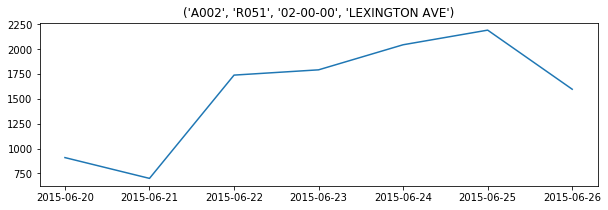

In [18]:
plot_single_turnstile(day_counts, turnstile_name)
plt.title(turnstile_name)

#### Challenge 5

- So far we've been operating on a single turnstile level, let's
  combine turnstiles in the same ControlArea/Unit/Station combo. There
  are some ControlArea/Unit/Station groups that have a single
  turnstile, but most have multiple turnstilea-- same value for the
  C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each
ControlArea/UNIT/STATION combo, for each day, add the counts from each
turnstile belonging to that combo.

In [14]:
def station_combo_count(daily_counts):
    combo_counts = {}
    for (controlarea, unit, scp, station), rows in daily_counts.items():
        combo_key = (controlarea, unit, station)
        by_combo_key = combo_counts.get(combo_key, {})
    #     print(combo_key)
        for i in range(len(rows)):
            time = rows[i][0]
            count = rows[i][1]
            by_combo_key[time] = by_combo_key.get(time, 0) + count
            combo_counts[combo_key] = by_combo_key
    #         combo_counts.get()
    for key, value in combo_counts.items():
        combo_counts[key] = sorted(value.items())
        
    return combo_counts

In [15]:
station_combos = station_combo_count(day_counts)

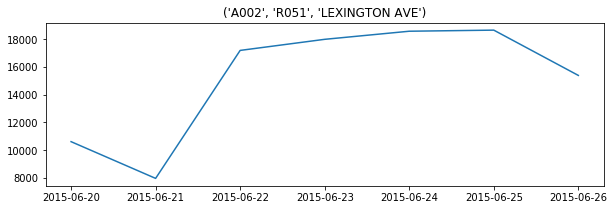

In [19]:
# Plot for a single turnstile
combo_name = list(day_counts.items())[0][0]
combo_name = (combo_name[:2]) + (combo_name[-1],)
combo_name
plot_single_turnstile(station_combos, combo_name)
plt.title(combo_name)

#### Challenge 6

Similarly, combine everything in each station, and come up with a time
series of `[(date1, count1),(date2,count2),...]` type of time series
for each STATION, by adding up all the turnstiles in a station.

In [20]:
def station_count(combo_counts):
    station_counts = {}
    for (controlarea, unit, station), rows in combo_counts.items():
        station_key = station
        by_station_key = station_counts.get(station_key, {})
    #     print(combo_key)
        for i in range(len(rows)):
            time = rows[i][0]
            count = rows[i][1]
            by_station_key[time] = by_station_key.get(time, 0) + count
            station_counts[station_key] = by_station_key
    #         combo_counts.get()
    for key, value in station_counts.items():
        station_counts[key] = sorted(value.items())
        
    return station_counts

In [21]:
stations = station_count(station_combos)

#### Challenge 7

Plot the time series for a station.

In [22]:
# Plot for a single turnstile
station_name = list(stations.items())[0][0]
station_name = '34 ST-PENN STA'

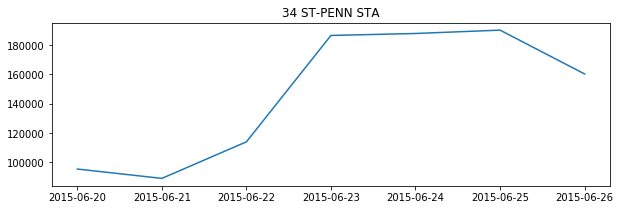

In [23]:
plot_single_turnstile(stations, station_name)
plt.title(station_name)

#### Challenge 8

- Make one list of counts for **one** week for one station. Monday's
count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another
week.
`plt.plot(week_count_list)` for every `week_count_list` you created
this way. You should get a rainbow plot of weekly commute numbers on
top of each other.

In [30]:
def plot_week(file_names, station_name):
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    plt.figure(figsize=(10,3))
    for fn in file_names:
        print("Working with '" + fn + "'")
        base_dict = create_dict(fn)
        datetime_dict = convert_datetime(base_dict)
        day_counts = count_daily(datetime_dict)
        station_combos = station_combo_count(day_counts)
        stations = station_count(station_combos)
        weekly_data = []
        for date, item in sorted(stations[station_name]):
            weekly_data.append(item)
        plt.plot(weekly_data, label=fn)

    plt.legend()
    plt.title(station_name)
    plt.show()

In [31]:
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150704.txt
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150711.txt
files = ['turnstile_150627.txt', 'turnstile_150704.txt', 'turnstile_150711.txt']
station_name = '34 ST-PENN STA'

Working with 'turnstile_150627.txt'
Working with 'turnstile_150704.txt'
Working with 'turnstile_150711.txt'


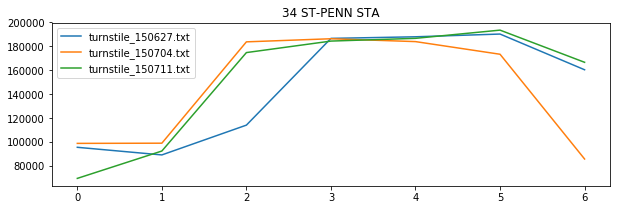

In [32]:
plot_week(files, station_name)

#### Challenge 9

- Over multiple weeks, sum total ridership for each station and sort
  them, so you can find out the stations with the highest traffic
  during the time you investigate

In [33]:
sum_total_ridership = {}

for fn in files:
    print("Working with '" + fn + "'")
    base_dict = create_dict(fn)
    datetime_dict = convert_datetime(base_dict)
    day_counts = count_daily(datetime_dict)
    station_combos = station_combo_count(day_counts)
    stations = station_count(station_combos)
    for station, rows in stations.items():
        if station in sum_total_ridership.keys():
            sum_total_ridership[station] += sum([count for date, count in rows])
        else:
            sum_total_ridership[station] = sum([count for date, count in rows])

Working with 'turnstile_150627.txt'
Working with 'turnstile_150704.txt'
Working with 'turnstile_150711.txt'


In [34]:
sum_total_ridership = sorted(sum_total_ridership.items(), key=lambda x: x[1], reverse=True)

In [35]:
for i in range(len(sum_total_ridership)):
    if sum_total_ridership[i][-1] < 0:
        sum_total_ridership = sum_total_ridership[:i]
        break
for i in range(len(sum_total_ridership)):
    if sum_total_ridership[i][-1] < 10000000:
        sum_total_ridership = sum_total_ridership[(i):]
        break
print(sum_total_ridership)

[('34 ST-PENN STA', 3102337), ('42 ST-GRD CNTRL', 2671217), ('34 ST-HERALD SQ', 2071774), ('14 ST-UNION SQ', 1958353), ('42 ST-TIMES SQ', 1821131), ('42 ST-PA BUS TE', 1549506), ('96 ST', 1363345), ('CANAL ST', 1359310), ('FULTON ST', 1281180), ('125 ST', 1238391), ('CHAMBERS ST', 1182871), ('23 ST', 1134665), ('59 ST', 1112225), ('MAIN ST', 1091614), ('47-50 ST-ROCK', 974723), ('ROOSEVELT AVE', 905900), ('50 ST', 862181), ('WALL ST', 828637), ('PATH WTC', 804210), ('BARCLAYS CENTER', 739978), ('8 AVE', 738569), ('W 4 ST-WASH SQ', 736105), ('JAMAICA CENTER', 715341), ('77 ST', 707527), ('14 ST', 701697), ('PELHAM PARKWAY', 698120), ('LEXINGTON-53 ST', 683178), ('145 ST', 681134), ('CHURCH AVE', 681102), ('JAY ST-METROTEC', 676150), ('42 ST-BRYANT PK', 675981), ('28 ST', 666643), ('BOROUGH HALL/CT', 632889), ('BOWLING GREEN', 574506), ('MYRTLE AVE', 557542), ('33 ST', 545952), ('GRAND ST', 545534), ('SUTPHIN BLVD', 537109), ('68ST-HUNTER COL', 531304), ('CROWN HTS-UTICA', 506945), ('DEK

In [47]:
print("Top 10 Highest Traffic Stations:")
print('')
print('%-*s %s' % (20, 'Station Name', 'Total Traffic'))
print('%-*s %s' % (20, '------------', '-------------'))
for i in sum_total_ridership[:10]:
    print("%-*s %d" % (20, i[0], i[1]))

Top 10 Highest Traffic Stations:

Station Name         Total Traffic
------------         -------------
34 ST-PENN STA       3102337
42 ST-GRD CNTRL      2671217
34 ST-HERALD SQ      2071774
14 ST-UNION SQ       1958353
42 ST-TIMES SQ       1821131
42 ST-PA BUS TE      1549506
96 ST                1363345
CANAL ST             1359310
FULTON ST            1281180
125 ST               1238391


#### Challenge 10

- Make a single list of these total ridership values and plot it with

    plt.hist(total_ridership_counts)

to get an idea about the distribution of total ridership among
different stations.

This should show you that most stations have a small traffic, and the
histogram bins for large traffic volumes have small bars.

*Additional Hint*:

If you want to see which stations take the meat of the traffic, you
can sort the total ridership counts and make a `plt.bar` graph. For
this, you want to have two lists: the indices of each bar, and the
values. The indices can just be `0,1,2,3,...`, so you can do

    indices = range(len(total_ridership_values))
    plt.bar(indices, total_ridership_values)

In [48]:
indices = []
total_ridership_values = []
for (index, total_ridership) in sum_total_ridership:
    indices.append(index)
    total_ridership_values.append(total_ridership)

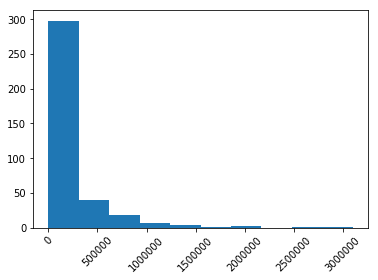

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.hist(total_ridership_values);
plt.xticks(rotation=45);

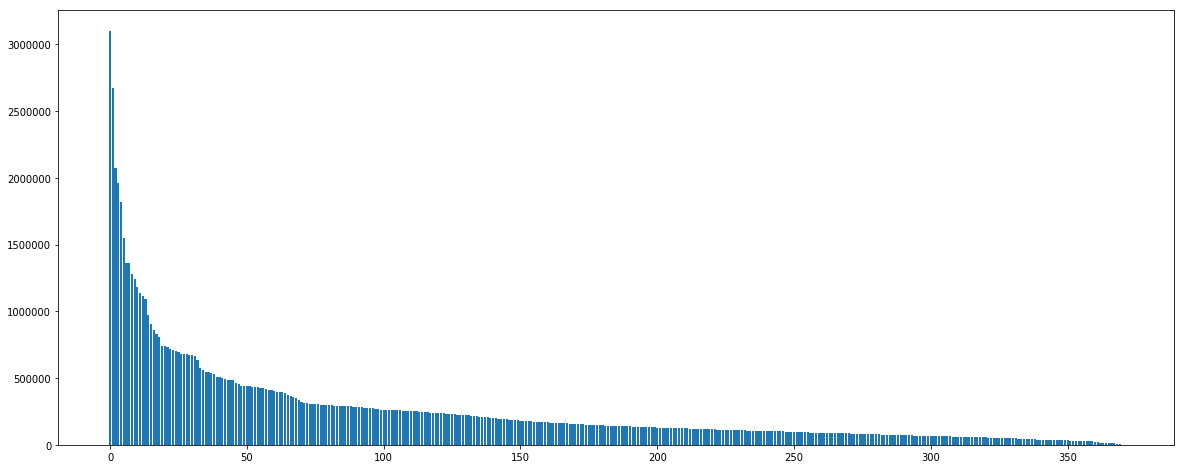

In [50]:
plt.figure(figsize=(20,8))
indices = range(len(total_ridership_values))
plt.bar(indices, total_ridership_values);